# Covid-19 and 5G

Conspiracy theories during and after the pandemic

Francesco Iarlori, Armando Leotta, Adriano Oliveto, Domingo Scisci  
2025-01-23

<a target="_blank" href="https://colab.research.google.com/github/domingoscisci/covid_5g/blob/main/output/covid_5g.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install praw

import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
import re
from tqdm import tqdm
from datetime import datetime
import praw
import configparser
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

tqdm.pandas()

## Introduction

The Covid-19 marked a huge social rift, establishing a historic point
from which to start again. This pandemic represents one of the most
significant and transformative events of the 21st century, profoundly
affecting not only public health, but also social, economic and cultural
structures globally. As pointed out by Alon et al. (2020), ‘the COVID-19
crisis is not just a health crisis; it is a social and economic crisis
of unprecedented scale.’ This event has generated a global emergency
context that offers a unique opportunity to examine how societies
respond to systemic crises and how social inequalities manifest and
exacerbate in such circumstances. From a sociological perspective,
COVID-19 has highlighted and amplified many of the pre-existing
dynamics, such as social, economic and health inequalities. According to
Bambra et al. (2020), the pandemic highlighted ‘syndemic interactions’
between COVID-19 and other health conditions, disproportionately
affecting disadvantaged groups. This phenomenon reflects structural
inequalities, as low-income and ethnic minority populations were often
the most vulnerable to both infection but especially to the economic
impacts of containment measures. COVID-19 has transformed the modes of
social interaction, accelerating technological changes such as
teleworking and distance learning. These changes have produced new areas
of sociological study, with implications for family dynamics, work
relationships and psychological well-being. As pointed out by De’,
Pandey, and Pal (2020), ‘digital technologies have become central to
maintaining work, education, and social life during the pandemic, but
their rapid adoption has also highlighted issues of access and equity.’
Forced digitisation has created a ‘digital divide’ that separates those
who have access to the necessary technologies and skills from those who
are excluded. Another crucial aspect is the role of government policies
and health institutions in managing the crisis. The pandemic has raised
questions about the relationship between citizens and governments,
fueling debates about the legitimacy of restrictions and the balance
between public safety and individual freedoms.

Thus, COVID-19 offered an opportunity to reflect on the concept of
‘social resilience,’ understood as the ability of communities to adapt
and respond to crisis situations. According to keck and Sakdapolrak
(2013), social resilience is not only about the ability to recover from
a shock, but also includes transformation towards more equitable and
sustainable forms of organisation. This approach is particularly
relevant in the context of COVID-19, where the pandemic acted both as an
immediate health crisis and as a catalyst for long-term structural
changes. Therefore, it represents a complex and multidimensional
phenomenon that challenges traditional sociological theories and opens
up new perspectives for the study of the interactions between health,
society and politics. Examining these aspects not only contributes to a
better understanding of the impact of the pandemic, but also offers
tools to prepare for future global crises.

In a previous group project, we focused our analysis on tweets published
during the early months of the pandemic in the UK. The analysis clearly
revealed the presence, even in the initial stages, of a conspiratorial
core, which perceived the pandemic as either a form of control over
people by the so-called “powerful elites” or as “fake news” aimed at
concealing the real interests of dominant groups. This group is clearly
visible in the identified network (highlighted in magenta), an image of
which is provided below.

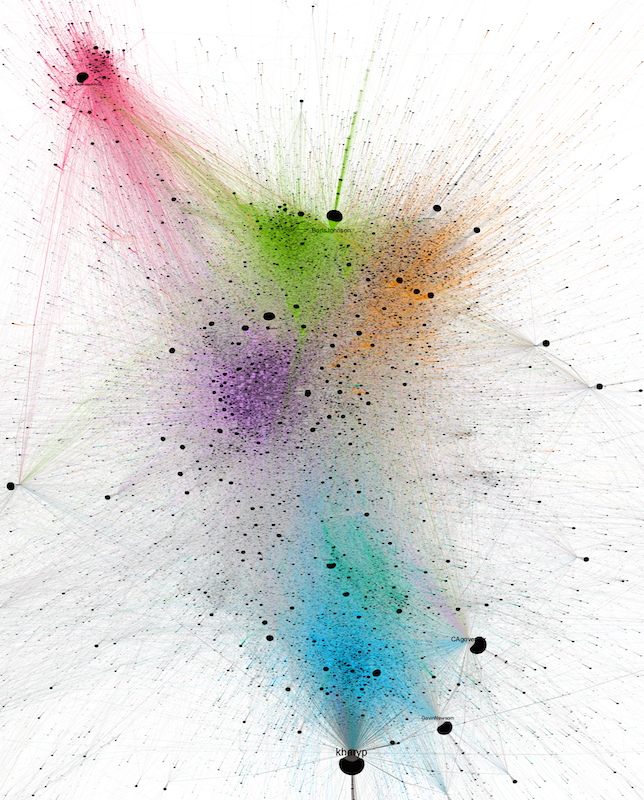

> **Research question**:
>
> -   Starting from the socio-cultural importance that the pandemic
>     played within the so called “conspiracy” social groups, what
>     remains of the relationship between these theories (e.g., 5G) and
>     the COVID-19 narrative?
> -   By using a different platform that allows the identification of
>     thematic groups, what are the most widespread sentiments and
>     emotions?

Based on Google Trends data, we can observe that the link between
COVID-19 and 5G was established early in the pandemic, with a peak in
April 2020. Although there are no scientifically proven adverse health
impacts from the exposure to 5G radio frequency radiation, in social
media misinformation related to 5G has been presented as facts, and
circulated extensively. A 2021 article (“How Does Fake News of 5G and
COVID-19 Spread Worldwide?” 2021) that monitored data from Google Trends
showed that searches related to coronavirus and 5G started at different
times, but peaked in the same week of April 5 in six countries.

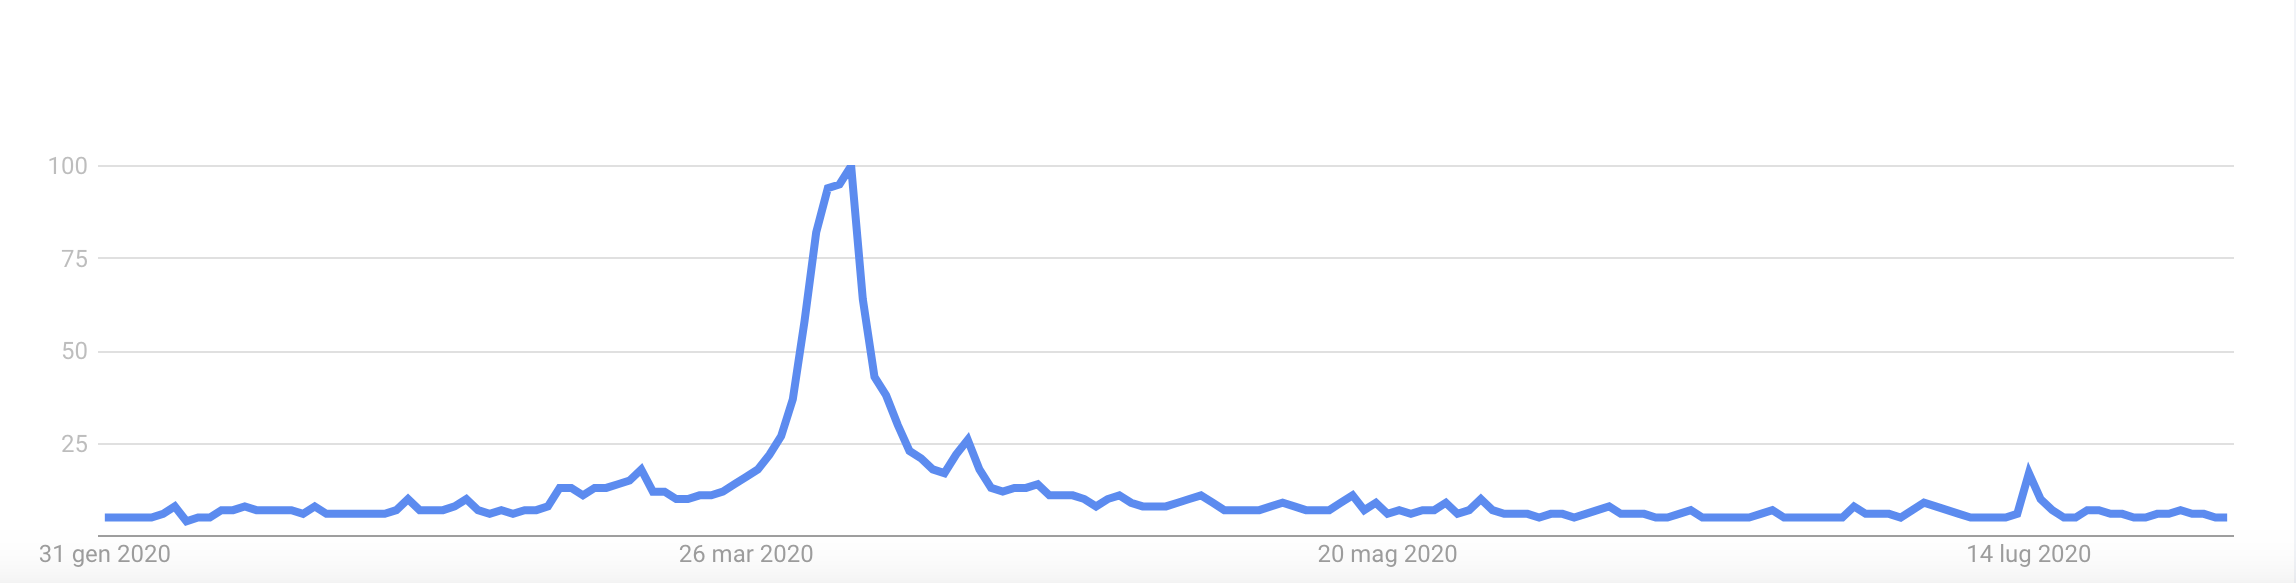

## Methodology

The results of the analysis on twitter data revealed a significant
connection between cospiracy (in particular, 5G related theories) at the
time of Covid pandemic. The idea behind the analysis is to check,
nowadays, if similar trends are still evindent, also years after the
pandemic and in a different audience and social network e.g. on Reddit.

Studying conspiracy theories on Reddit is particularly valuable due to
the platform’s unique structure and community dynamics. Reddit operates
through user-driven subreddits, each focused on specific topics or
interests, fostering highly engaged and often ideologically homogeneous
communities. This decentralized structure allows conspiracy theories to
gain traction, evolve, and spread within echo chambers where like-minded
individuals reinforce one another’s beliefs. Furthermore, Reddit’s
voting system, which amplifies popular content, enables rapid
dissemination of narratives, including misinformation, to broader
audiences. Its semi-anonymous nature also encourages open discussions,
making it a rich resource for analyzing the origins, evolution, and
social impact of conspiratorial discourse in real time.

To better understand the dynamics of conspiracy-related discussions on
Reddit, we conducted an analysis of user comments within a selected
subreddit using sentiment analysis and emotion analysis techniques.
Sentiment analysis provides insights into the overall tone of the
discourse—whether positive, negative, or neutral—while emotion analysis
helps identify specific emotional drivers, such as fear, anger, or
curiosity, that fuel engagement with conspiratorial narratives. This
dual approach enables us to capture both the affective undercurrents and
the broader narrative tendencies within the community, shedding light on
how emotional responses contribute to the spread and persistence of
conspiracy theories.

Sentiment analysis and emotion analysis represent two complementary but
distinct approaches in the field of natural language processing (NLP).
Sentiment analysis focuses on identifying the polarity of a text,
generally classifying it as positive, negative or neutral. As stated by
Liu (2012), ‘sentiment analysis aims to discover opinions and attitudes
expressed, often reducing emotional complexity to a binary or ternary
dimension’. This simplification makes sentiment analysis ideal for
applications such as monitoring online reputation or analysing consumer
reviews. Whereas, emotion analysis goes beyond the latter polarity by
trying to identify specific emotions expressed in the text, such as
anger, joy, sadness or fear. In our case, we used the fields identified
by Google. As described by Mohammad and Turney (2013), ‘emotion analysis
explores the human emotional spectrum, relying on psychological theories
that describe primary and secondary emotions’. This approach has
applications in more complex contexts.

In summary, while sentiment analysis simplifies emotions into polarity
categories, emotion analysis focuses on more detailed emotional mapping,
enriching the interpretative possibilities of textual data.

## Analysis and Results

### Data Scraping

We focused our attention on the
[r/conspiracy](https://www.reddit.com/r/conspiracy/) subreddit, which is
a subreddit dedicated to the study of conspiracies and secret societies.
We use the `PRAW` library for the data scraping using the Reddit’s API.
We build the `get_thread_list()` function to retrieve a list of threads
from the subreddit, and then the `get_thread_comments()` function to
retrieve the comments for each thread.

To use the `PRAW` library and connect to Reddit’s API, we create a token
using a personal account, as described in [Reddit’s
guide](https://support.reddithelp.com/hc/en-us/articles/16160319875092-Reddit-Data-API-Wiki).

In [2]:
config_filename = 'input/reddit_config.ini' # change this to point to your config file

config = configparser.ConfigParser()
config.read(config_filename)

reddit = praw.Reddit(
    client_id=config['reddit']['client_id'],
    client_secret=config['reddit']['client_secret'],
    user_agent=config['reddit']['user_agent'],
    check_for_async=False
)

In [3]:
def get_thread_list(
    reddit: praw.Reddit, subreddit: str, keywords: str
) -> pd.DataFrame:
    subreddit = reddit.subreddit(subreddit)
    search_results = subreddit.search(
        query=keywords, sort="comments", time_filter="all", limit=None
    )

    data_list = []
    for post in search_results:
        data_dict = {
            "date": datetime.fromtimestamp(post.created_utc),
            "title": post.title,
            "votes": post.score,
            "comments": post.num_comments,
            "link": re.sub(rf"^/r/{subreddit}/comments/", "", post.permalink),
        }
        data_list.append(data_dict)

    return pd.DataFrame(data_list)


# Function to convert UNIX timestamp to a readable date
def convert_timestamp(unix_timestamp):
    return datetime.utcfromtimestamp(unix_timestamp) \
    .strftime('%Y-%m-%d %H:%M:%S')


# Recursive function to extract all comments and nested comments
def extract_comments(comment, thread_id, thread_title, thread_author):
    # Extract comment data
    comment_data = {
        "thread_id": thread_id,
        "thread_title": thread_title,
        "thread_author": thread_author,
        "comment_id": comment.id,
        "parent_id": comment.parent_id,
        "author": str(comment.author) if comment.author else "Anonymous",
        "text": (
            comment.body
            if comment.body not in ["[deleted]", "[removed]"]
            else None
        ),
        "date": (
            convert_timestamp(comment.created_utc)
            if hasattr(comment, "created_utc")
            else None
        ),
    }
    nested_comments = []

    # If the comment has replies, process them recursively
    if comment.replies:
        comment.replies.replace_more(
            limit=None
        )  # Ensure all replies are loaded
        for reply in comment.replies:
            nested_comments.extend(
                extract_comments(reply, thread_id, thread_title, thread_author)
            )

    return [comment_data] + nested_comments


def scrape_threads(thread_urls):
    all_comments = []

    for thread_url in thread_urls:
        print(f"Processing thread: {thread_url}")
        # The following lines need to be indented to be part of the for loop
        submission = reddit.submission(url=thread_url)
        submission.comments.replace_more(limit=None)  # Load all comments

        # Extract thread metadata
        thread_id = submission.id
        thread_title = submission.title
        thread_author = str(submission.author)

        # Process top-level comments
        for top_level_comment in submission.comments:
            all_comments.extend(
                extract_comments(
                    top_level_comment, thread_id, thread_title, thread_author
                )
            )

        time.sleep(1)

    return all_comments

We use `get_thread_list()` and `scrape_threads()` to get all threads
list and download all comments from each thread respectively.

In [4]:
# Get the list of threads
df = get_thread_list(reddit, 'conspiracy', 'covid 5g')

# Create a list of thread URLs
baseurl = 'https://www.reddit.com/r/conspiracy/comments/'
thread_urls = [baseurl+link for link in df['link'].to_list()]

# Scrape threads and retrieve all comments
comments = scrape_threads(thread_urls)

# Create a Pandas DataFrame
comments_df = pd.DataFrame(comments)

# Remove empty comments
comments_df = comments_df.dropna(subset=['text'])

At the end of the process we have a dataset with **14165** comments from
**208** threads. The structure of the DataFrame is shown below
(**?@tbl-df_structure** and **?@tbl-df_excerpt**).

In [7]:
comments_df.describe().loc[['count', 'unique']]

In [9]:
comments_df.head()

### Descriptive Analysis

The distribution of comments over time reveals distinct peaks and
fluctuations in user activity on the subreddit. The most significant
spike occurred in the early months of the COVID-19 pandemic (around May
2020), likely reflecting heightened public interest and debate
surrounding conspiracy theories during the initial global crisis. After
this peak, activity decreased but remained steady with periodic surges,
particularly in late 2021, early 2022, and April 2023. These later peaks
may correspond to specific events or renewed public discourse around
related conspiracy theories. The overall trend suggests that while
initial activity was driven by the pandemic’s novelty, subsequent surges
indicate the community’s sustained engagement with conspiratorial
narratives in response to ongoing events.

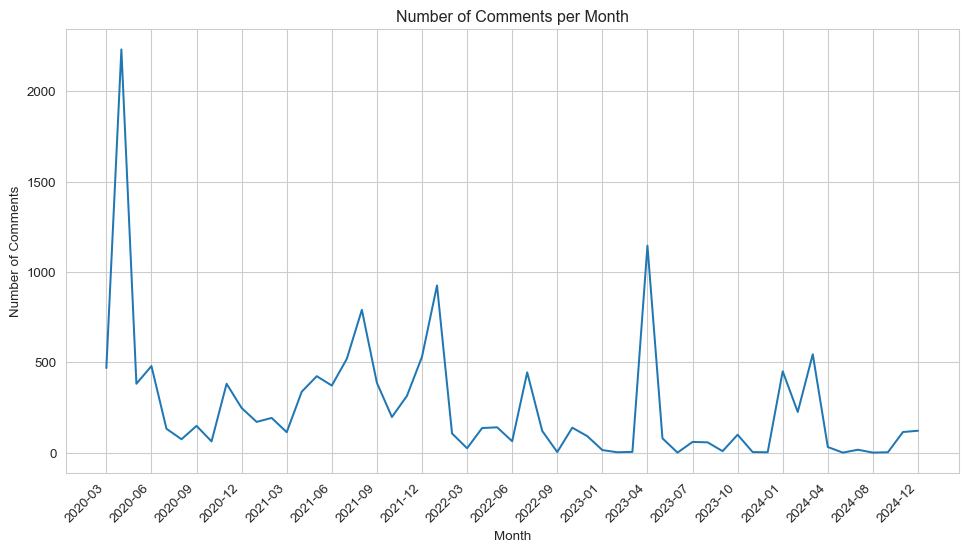

In [11]:
# Convert to datetime and group by month
comments_df['date'] = pd.to_datetime(comments_df['date'])
monthly_counts = comments_df.groupby(comments_df['date'].dt.to_period('M')).size().reset_index()
monthly_counts.columns = ['date', 'count']
monthly_counts['date'] = monthly_counts['date'].astype(str)

# Create the plot
def plot1(monthly_counts):
    fig = plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    sns.lineplot(data=monthly_counts, x='date', y='count')

    # Customize the plot
    plt.xticks(
        range(0, len(monthly_counts), 3),
        monthly_counts["date"][::3],
        rotation=45,
        ha="right",
    )
    plt.title('Number of Comments per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Comments')

    # Adjust layout to prevent label cutoff
    # plt.tight_layout()
    
    plt.show()

# Show the plot
plot1(monthly_counts)

The distribution of comment lengths highlights that most comments in the
subreddit are very short, with a significant majority falling below 500
characters. This suggests that the discussions are predominantly
composed of concise exchanges, such as brief opinions, reactions, or
agreements. However, the distribution also exhibits a long tail, with a
smaller number of comments exceeding 1,000 characters. These longer
comments likely represent more detailed contributions, such as in-depth
arguments, explanations, or rebuttals. The overall trend indicates that
while the subreddit is largely driven by quick interactions, there is
space for more substantial discourse within the community.

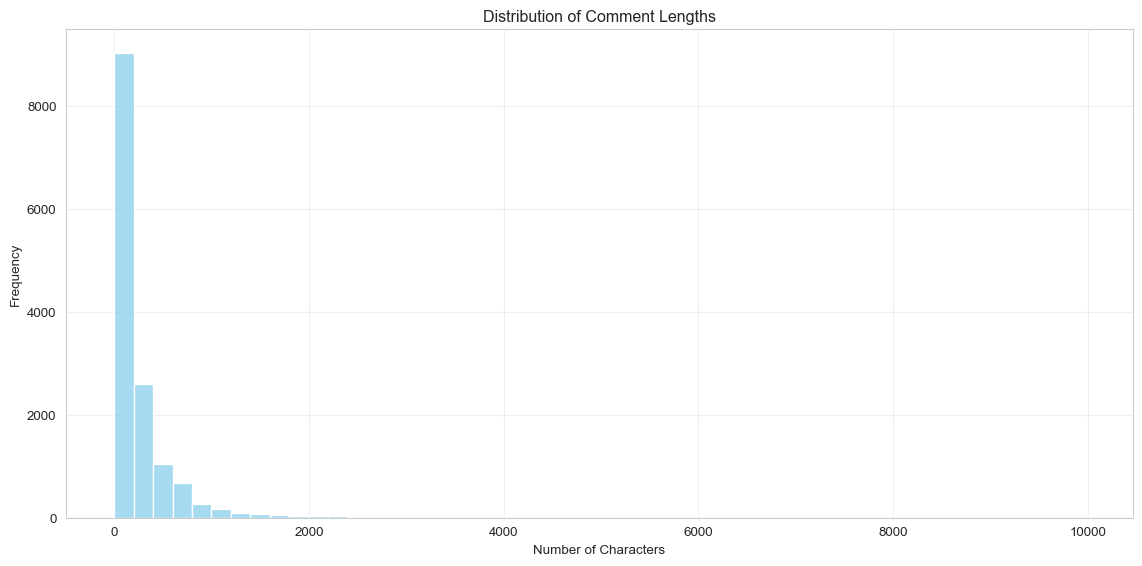

In [13]:
# Calculate character lengths
text_lengths = comments_df['text'].str.len()

# Create histogram
def plot2(text_lengths):
    fig = plt.figure(figsize=(12, 6))
    sns.histplot(data=text_lengths, 
                bins=50,
                color='skyblue')

    # Customize plot
    plt.title('Distribution of Comment Lengths')
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')

    # Add grid and adjust layout
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
   
    plt.show()

# Show the plot
plot2(text_lengths)

The distribution of average comment lengths per month reveals a
relatively stable trend, with most months maintaining an average between
200 and 400 characters. However, certain months, such as mid-2023, show
significant spikes, where the average comment length exceeds 500
characters. These peaks may indicate periods of more in-depth
discussions or debates triggered by specific events or controversies
within the subreddit. Conversely, months with lower averages might
reflect more reactive or concise interactions, potentially linked to
high activity levels or fleeting trends. This pattern suggests that
while the subreddit generally fosters brief exchanges, certain periods
see more substantial contributions, likely driven by topical engagement.

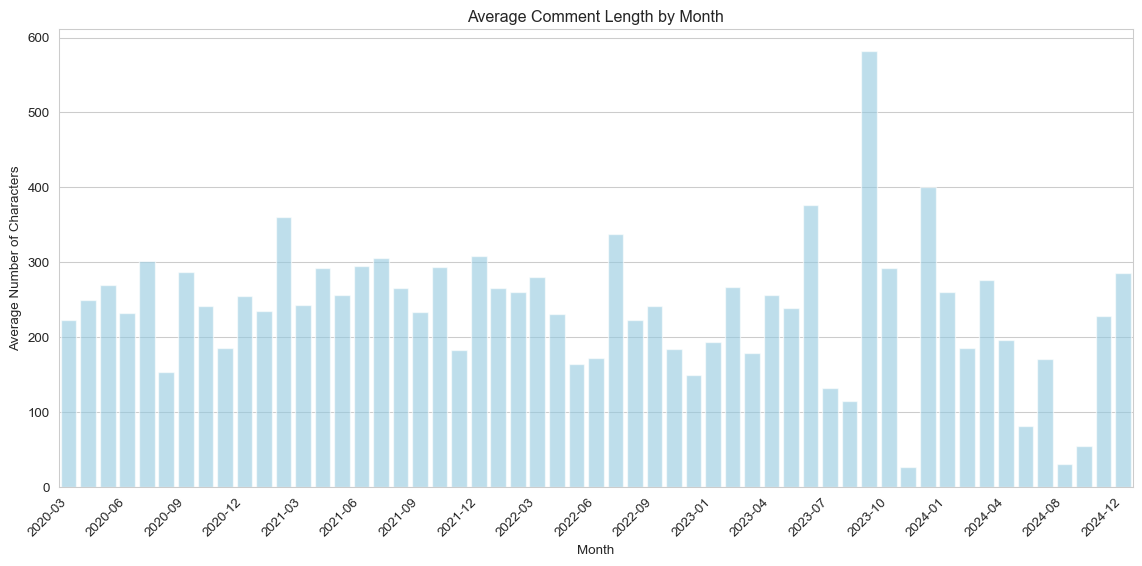

In [15]:
comments_df['text_length'] = comments_df['text'].str.len()
comments_df['date'] = pd.to_datetime(comments_df['date'])
monthly_stats = comments_df.groupby(comments_df['date'].dt.to_period('M'))['text_length'].agg(['mean', 'std']).reset_index()
monthly_stats['date'] = monthly_stats['date'].astype(str)

# Create bar plot with error bars
def plot3(monthly_stats):
    fig = plt.figure(figsize=(12, 6))
    sns.barplot(data=monthly_stats, 
              x='date', 
              y='mean',
              #  yerr=monthly_stats['std'],
              color='skyblue',
              alpha=0.6)

    # Customize plot
    plt.xticks(range(0, len(monthly_stats), 3), 
              monthly_stats['date'][::3], 
              rotation=45, 
              ha='right')
    plt.title('Average Comment Length by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Number of Characters')

    # Adjust layout
    plt.tight_layout()
    
    plt.show()

# Show the plot
plot3(monthly_stats)

### Sentiment Analysis

Before proceding with the sentiment analysis, we first need to clean the
text, removing HTML tags, emojis, links, new lines, etc.

In [16]:
nlp_en = spacy.load("en_core_web_sm")

def clean_text_en(text, include_stopwords=False):

    # Removal of HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Removal of emojis using a specific pattern
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols and pictograms
                               u"\U0001F680-\U0001F6FF"  # Transport and map symbols
                               u"\U0001F1E0-\U0001F1FF"  # Flags (regional indicators)
                               u"\U00002500-\U00002BEF"  # Miscellaneous symbols
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # Variants
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Removal of "RT" as an isolated word
    text = re.sub(r'\bRT\b', '', text)  # "\b" ensures that RT is treated as a separate word
    # Removal of links and user mentions
    text = re.sub(r'(https?://\S+|www\.\S+|@\w+\s*)', '', text)
    # Removal of hashtags
    text = re.sub(r'#[^\s]+', '', text)
    # Removal of newline characters and sequences of ">"
    text = text.replace("\n", '').replace(">", '')
    # Removal of special characters while retaining question marks
    text = re.sub(r'[^A-Za-zÀ-ÿ\s\'?]+', ' ', text)
    # Removal of multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()

    # Text analysis with spaCy for lemmatization
    doc = nlp_en(text)
    # doc = nlp_it(text)
    if include_stopwords:
        # Include stopwords
        cleaned_text = ' '.join(token.lemma_ for token in doc if not token.is_punct)
    else:
        # Exclude stopwords
        cleaned_text = ' '.join(token.lemma_ for token in doc if not token.is_stop and not token.is_punct)

    return cleaned_text

comments_df['clean_text'] = comments_df['text'].progress_apply(clean_text_en)

To perform the sentiment analysis we use the the [Twitter-roBERTa-base
for Sentiment
Analysis](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest),
trained by Cardiff NLP group at Cardiff University. The model was
trained on ~124M tweets from January 2018 to December 2021, and
finetuned for sentiment analysis with the TweetEval benchmark.

In [18]:
from transformers import pipeline
tokenizer_kwargs = {'padding':True,'truncation':True,'max_length':512}
sentiment = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest", **tokenizer_kwargs)

def sentiment_analysis(text):
    result = sentiment(text)
    return result[0]['label']

comments_df['sentiment'] = comments_df['clean_text'].progress_apply(sentiment_analysis)    

The sentiment distribution of the comments shows that the majority are
neutral (53.8%), indicating a predominantly objective or factual tone in
the discussions. Negative sentiments make up a significant portion
(35.8%), suggesting that many comments express criticism, frustration,
or disagreement, which is common in discussions involving conspiracy
theories or controversial topics. Positive sentiments, on the other
hand, are relatively rare (10.3%), reflecting that expressions of
support, agreement, or optimism are less frequent. This distribution
suggests that while most interactions aim to remain neutral or
informational, the discourse leans more toward negativity than
positivity, highlighting the contentious and polarizing nature of the
subreddit’s themes.

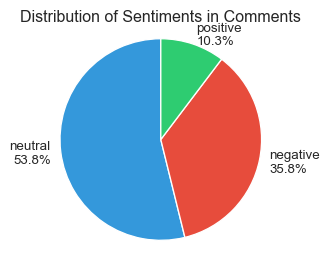

In [21]:
colors = {
    'Positive': '#2ecc71',
    'Negative': '#e74c3c', 
    'Neutral': '#3498db'
}

# Calculate sentiment distribution
def plot4(comments_df, colors):
  sentiment_dist = comments_df['sentiment'].value_counts()
  total = len(comments_df)
  percentages = [f'{(v/total)*100:.1f}%' for v in sentiment_dist]

  # Create pie chart
  fig = plt.figure(figsize=(4, 3))
  plt.pie(sentiment_dist, 
          labels=[f'{k}\n{p}' for k, p in zip(sentiment_dist.index, percentages)],
          colors=[colors[k.capitalize()] for k in sentiment_dist.index],
          autopct='',
          startangle=90)

  plt.title('Distribution of Sentiments in Comments')
  plt.axis('equal')
  
  plt.show()

plot4(comments_df, colors)

The sentiment trends over time show that neutral comments consistently
dominate the subreddit discussions (blue), maintaining higher numbers
across all time periods. Peaks in sentiment activity, particularly
around early 2020, late 2021, and mid-2023, align with significant
spikes in comment volume, likely tied to key events or controversies.
Negative comments (red) generally follow a similar pattern to neutral
ones, with noticeable surges during these periods, indicating a rise in
criticism or frustration. Positive comments (green) remain consistently
lower, with minor increases during peak activity times, suggesting that
optimism or agreement is less prevalent. Overall, the data reflects a
trend where neutral and negative sentiments shape the majority of
discussions, emphasizing the community’s focus on debate and critique
rather than consensus or positivity.

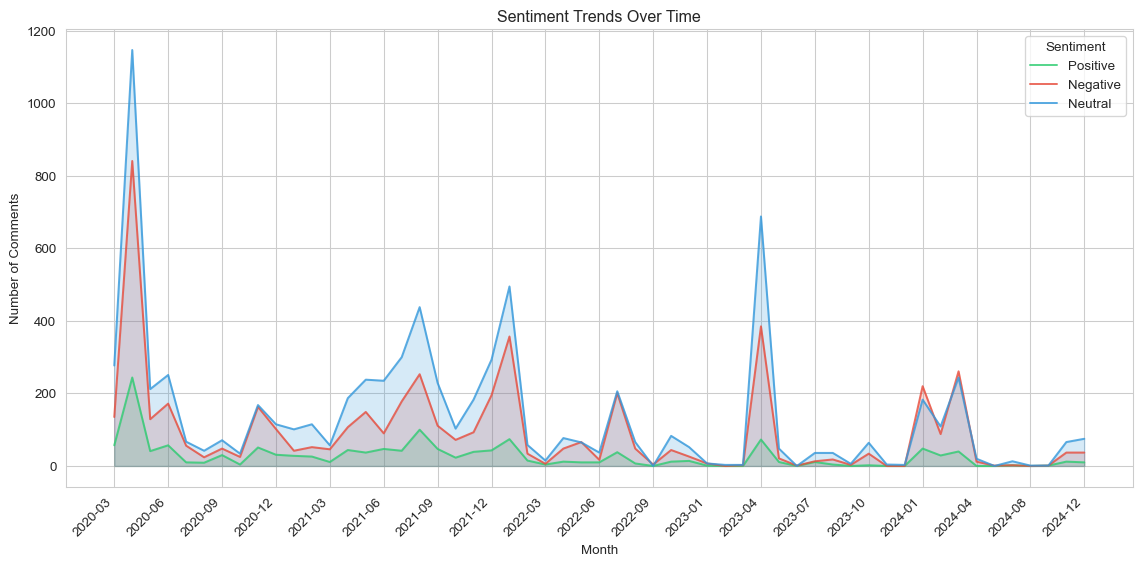

In [23]:
# Group by month and sentiment
comments_df['date'] = pd.to_datetime(comments_df['date'])
sentiment_counts = comments_df.groupby([comments_df['date'].dt.to_period('M'), 'sentiment']).size().unstack(fill_value=0).reset_index()
sentiment_counts['date'] = sentiment_counts['date'].astype(str)

# Define custom colors for better visibility
colors = {
    'positive': '#2ecc71',  # green
    'negative': '#e74c3c',  # red
    'neutral': '#3498db'    # blue
}

# Create line plot with filled areas
def plot5(sentiment_counts, colors):
  fig = plt.figure(figsize=(12, 6))
  sns.set_style("whitegrid")

  # Plot each sentiment with filled areas and custom colors
  for sentiment in ['positive', 'negative', 'neutral']:
      sns.lineplot(data=sentiment_counts, 
                  x='date', 
                  y=sentiment, 
                  label=sentiment.capitalize(),
                  color=colors[sentiment],
                  alpha=0.8)
      plt.fill_between(sentiment_counts.index, 
                      sentiment_counts[sentiment], 
                      color=colors[sentiment],
                      alpha=0.2)

  # Customize plot
  plt.xticks(range(0, len(sentiment_counts), 3), 
            sentiment_counts['date'][::3], 
            rotation=45, 
            ha='right')
  plt.title('Sentiment Trends Over Time')
  plt.xlabel('Month')
  plt.ylabel('Number of Comments')
  plt.legend(title='Sentiment')

  plt.tight_layout()
  
  plt.show()

plot5(sentiment_counts, colors)

The sentiment trends for threads with 100 or more comments demonstrate a
similar overall pattern to general subreddit activity, with neutral
sentiments (blue) being the most dominant across all time periods.
Threads with high engagement show significant spikes in sentiment
activity, particularly during major peaks in early 2020, late 2021, and
mid-2023. Negative sentiments (red) closely follow neutral ones,
suggesting that highly active threads often involve contentious or
critical discussions. Positive sentiments (green) remain consistently
low, even in these high-engagement threads, indicating that even in
popular discussions, expressions of agreement or optimism are rare. This
distribution suggests that threads with significant participation are
driven by debates, critiques, or polarizing topics rather than
consensus-building or positive discourse.

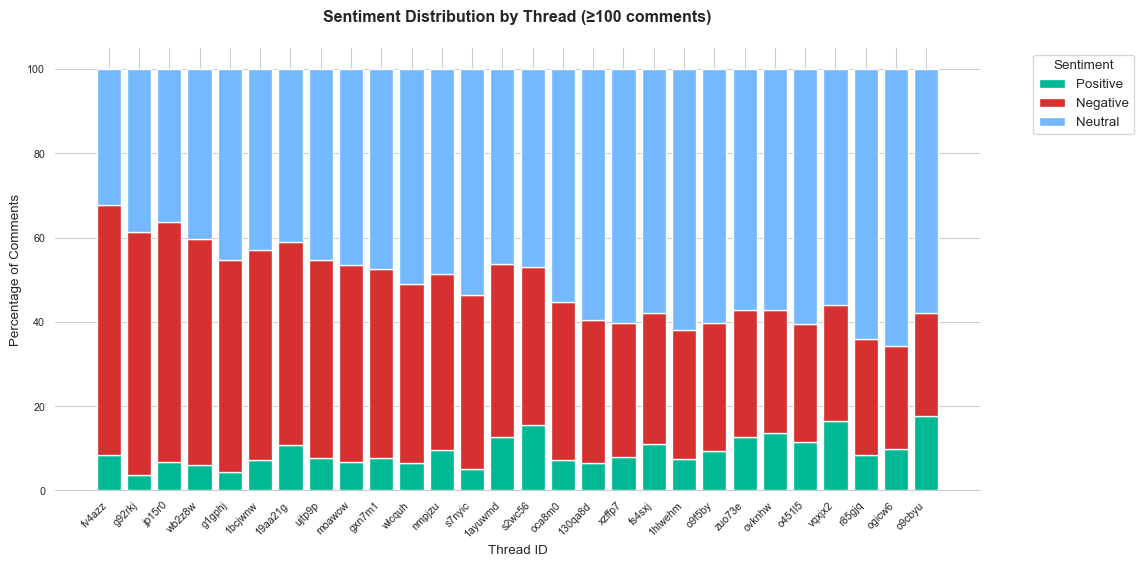

In [25]:
# Get large threads and calculate percentages
thread_counts = comments_df.groupby('thread_id').size()
large_threads = thread_counts[thread_counts >= 100].index
df_filtered = comments_df[comments_df['thread_id'].isin(large_threads)]
sentiment_by_thread = df_filtered.groupby(['thread_id', 'sentiment']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_by_thread.div(sentiment_by_thread.sum(axis=1), axis=0) * 100

# Sort by negative sentiment percentage
sentiment_percentages = sentiment_percentages.sort_values(by='negative', ascending=False)

# Create plot
def plot6(sentiment_percentages):
    # Set seaborn style
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))
    
    # Get data for plotting
    pos = sentiment_percentages['positive'].values
    neg = sentiment_percentages['negative'].values
    neu = sentiment_percentages['neutral'].values
    x = np.arange(len(sentiment_percentages.index))
    
    # Create stacked bars
    plt.bar(x, pos, label='Positive', color='#00b894', width=0.8)
    plt.bar(x, neg, bottom=pos, label='Negative', color='#d63031', width=0.8)
    plt.bar(x, neu, bottom=pos+neg, label='Neutral', color='#74b9ff', width=0.8)
    
    # Customize plot with seaborn aesthetics
    sns.despine(left=True)
    plt.title('Sentiment Distribution by Thread (≥100 comments)', 
             pad=20, fontsize=12, fontweight='bold')
    plt.xlabel('Thread ID', fontsize=10)
    plt.ylabel('Percentage of Comments', fontsize=10)
    
    # Set x-axis labels
    plt.xticks(x, sentiment_percentages.index, rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    
    # Add legend
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

plot6(sentiment_percentages)

To analyze the content of the comments based on the type of sentiment,
we applied the **Term Frequency-Inverse Document Frequency** (TF-IDF)
function. TF-IDF is a technique used to measure the importance of a word
in a corpus of documents. It is based on two main components:

-   *Term Frequency (TF):* measures how often a word appears in a single
    document.
-   *Inverse Document Frequency (IDF):* assesses how “special” or rare a
    word is across the entire corpus, penalizing terms that are too
    common (e.g., “and” or “the”). The product of these two components
    assigns a higher score to words that are frequent in a document but
    rare across the entire corpus, making them ideal for identifying key
    terms in the analyzed content.

The wordclouds highlight the distinctive words for each type of
sentiment:

1.  **Positive Sentiment Words (green)**: Key terms include *“thank”*,
    *“great”*, *“good”*, and *“nice”*, which indicate appreciation,
    recognition, and positive tone. Other words like *“love”* and
    *“interesting”* suggest engagement and curiosity towards the
    content.

2.  **Negative Sentiment Words (red)**: Words such as *“shit”*,
    *“fuck”*, *“bad”*, and *“vaccine”* dominate this wordcloud,
    reflecting frustration, criticism, or anger. The presence of terms
    related to COVID-19 (*“covid”*, *“virus”*, *“death”*) and conspiracy
    theories (*“conspiracy”*) highlights the often polemical and
    polarized context of the discussions.

3.  **Neutral Sentiment Words (blue)**: The neutral wordcloud includes
    more generic and informational terms like *“people”*, *“think”*,
    *“know”*, and *“comment”*. These terms suggest exchanges of ideas or
    information without strong emotional charge. The presence of words
    like *“conspiracy”* and *“earth”* may indicate a context of rational
    or argumentative discussions, often typical of conspiracy theory
    discourse.

The wordclouds clearly reflect the differences in tone and purpose of
the comments. Positive sentiments show appreciation and agreement,
negative sentiments reveal criticism and frustration, and neutral
sentiments represent more informational exchanges or less emotionally
charged debates. This demonstrates how the subreddit dynamics range from
intense emotional expressions to more rational discussions.

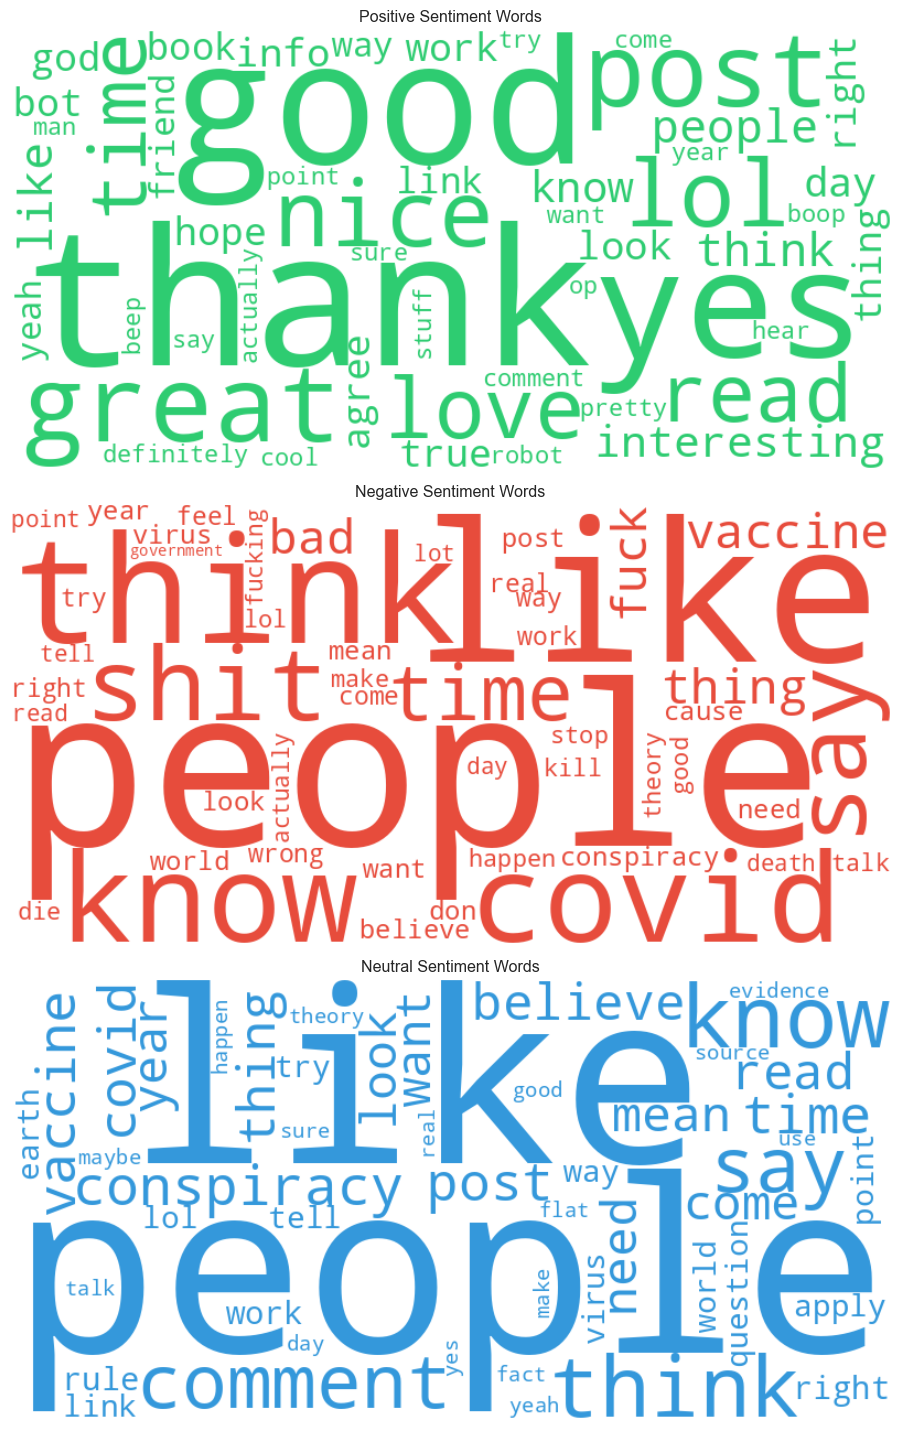

In [27]:
# Initialize TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)

# Create figure for subplots
def plot7(comments_df, tfidf):
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))
    sentiment_colors = {'positive': '#2ecc71', 'negative': '#e74c3c', 'neutral': '#3498db'}

    # Generate wordcloud for each sentiment
    for idx, sentiment in enumerate(['positive', 'negative', 'neutral']):
        # Filter text by sentiment and remove NaN values
        text_by_sentiment = comments_df[comments_df['sentiment'] == sentiment]['clean_text'].dropna()
        
        if len(text_by_sentiment) > 0:  # Check if we have data
            # Calculate TF-IDF
            tfidf_matrix = tfidf.fit_transform(text_by_sentiment)
            feature_names = tfidf.get_feature_names_out()
            
            # Get average TF-IDF scores
            avg_scores = np.asarray(tfidf_matrix.mean(axis=0)).ravel()
            word_scores = dict(zip(feature_names, avg_scores))
            
            # Generate and plot wordcloud
            wordcloud = WordCloud(width=800, height=400,
                                background_color='white',
                                color_func=lambda *args, **kwargs: sentiment_colors[sentiment],
                                max_words=50)
            wordcloud.generate_from_frequencies(word_scores)
            
            # Plot
            axes[idx].imshow(wordcloud, interpolation='bilinear')
            axes[idx].set_title(f'{sentiment.capitalize()} Sentiment Words')
        
        axes[idx].axis('off')

    plt.tight_layout()
    
    plt.show()

# Show the plot
plot7(comments_df, tfidf)

### Emotion Analysis

For emotion analysis we use the
[SamLowe/roberta-base-go_emotions](https://huggingface.co/SamLowe/roberta-base-go_emotions)
model. The model was trained from
[roberta-base](https://huggingface.co/roberta-base) on the [go_emotions
dataset](https://huggingface.co/datasets/go_emotions) for multi-label
classification.

In [28]:
from transformers import pipeline
tokenizer_kwargs = {'padding':True,'truncation':True,'max_length':512}
emotion = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions", **tokenizer_kwargs)

def emotion_analysis(text):
    result = emotion(text)
    return result[0]['label']

comments_df['emotion'] = comments_df['clean_text'].progress_apply(emotion_analysis)

The distribution of emotions in the comments reveals that the majority
of them are classified as “neutral,” with 10,183 instances dominating
the dataset. This suggests that a significant portion of the discussions
is factual or lacks strong emotional expression. Among the identifiable
emotions, *amusement* (606), *admiration* (515), and *gratitude* (419)
are the most frequent, indicating a notable presence of positive
interactions. On the other hand, negative emotions such as *annoyance*
(403) and *anger* (257) are also prevalent, reflecting critical or
frustrated tones in some discussions. Less common emotions include
*sadness* (169), *joy* (124), and *surprise* (90), suggesting limited
expressions of extreme emotional states. Overall, the data indicates a
blend of neutral, positive, and negative tones, with neutrality being
the most dominant characteristic of the conversations.

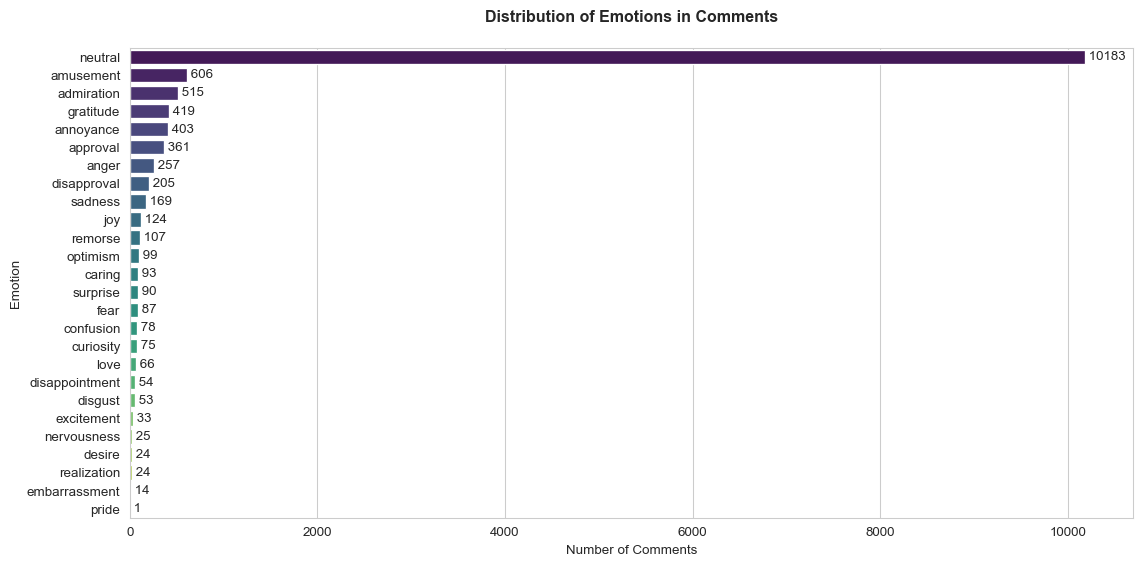

In [30]:
# Calculate emotion distribution
emotion_dist = comments_df['emotion'].value_counts()

# Create figure
def plot8(emotion_dist):
  fig = plt.figure(figsize=(12, 6))

  # Plot horizontal bar chart
  sns.barplot(x=emotion_dist.values, 
            y=emotion_dist.index, 
            palette='viridis',
            hue=emotion_dist.index,
            legend=False,
            orient='h')

  # Customize plot
  plt.title('Distribution of Emotions in Comments', pad=20, fontsize=12, fontweight='bold')
  plt.xlabel('Number of Comments', fontsize=10)
  plt.ylabel('Emotion', fontsize=10)

  # Add value annotations
  for i, v in enumerate(emotion_dist.values):
      plt.text(v, i, f' {v}', va='center')

  plt.tight_layout()
  
  plt.show()

# Show the plot
plot8(emotion_dist)

This radar chart focuses exclusively on the comments with positive and
negative sentiment, mapping them to the top five identified emotions
within these subsets. It is important to note that this represents only
a selection of the dataset, as the majority of comments in the full
sample are neutral in both sentiment and emotion. However, analyzing
this subset highlights interesting patterns:

-   For **positive comments**, *admiration* is the most prevalent
    emotion, followed by *gratitude* and *approval*, while *amusement*
    and *joy* are less frequent. This suggests that positive comments
    often involve acknowledgment, appreciation, or validation rather
    than expressions of humor or happiness.

-   For **negative comments**, *annoyance* is the dominant emotion,
    significantly surpassing others such as *anger* and *disapproval*.
    Emotions like *sadness* and *amusement* are present but much less
    pronounced. This indicates that negative comments are primarily
    driven by frustration or irritation, with fewer expressions of
    deeper negativity or critical humor.

This comparison provides insight into how emotions manifest differently
in positive and negative sentiment, emphasizing the roles of
*admiration* and *annoyance* as key drivers in these two contrasting
emotional contexts.

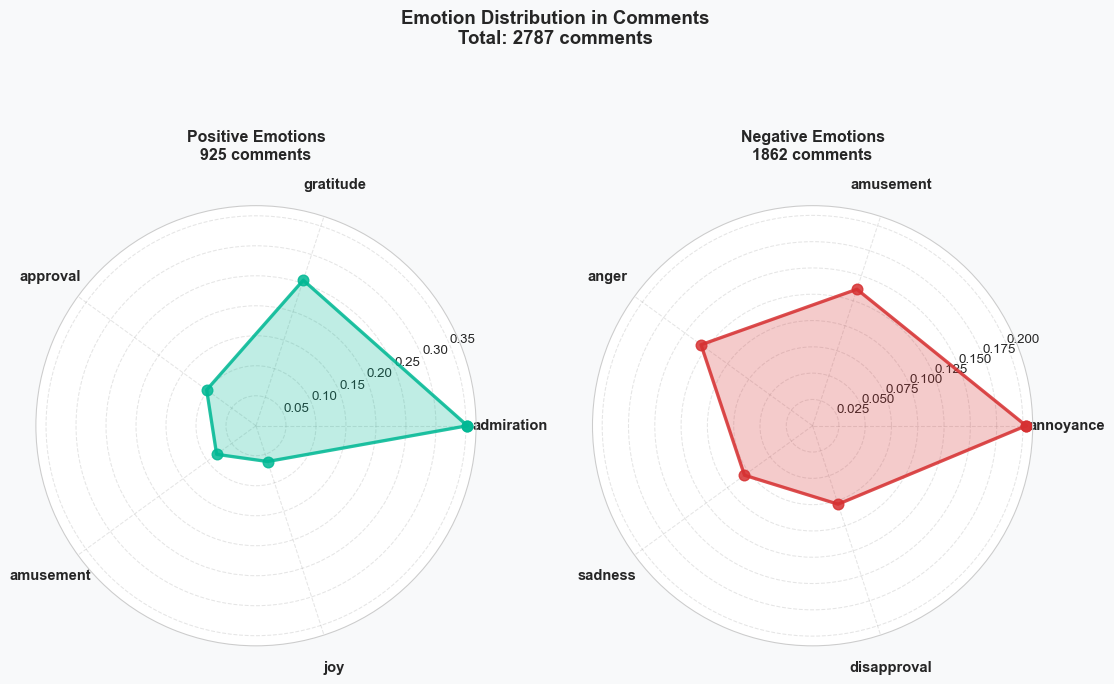

In [32]:
def analyze_pos_neg_emotions(df, top_n=5):
    # Setup figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), 
                                  subplot_kw=dict(projection='polar'))
    
    colors = {
        'positive': '#00b894',
        'negative': '#d63031'
    }
    axes = {'positive': ax1, 'negative': ax2}

    # Filter data
    df_filtered = df[df['sentiment'].isin(['positive', 'negative'])]
    df_filtered = df_filtered[df_filtered["emotion"] != "neutral"]
    total_comments = len(df_filtered)

    # Set figure style
    fig.patch.set_facecolor('#f8f9fa')
    plt.rcParams['font.family'] = 'sans-serif'

    for sentiment in ['positive', 'negative']:
        sentiment_data = df_filtered[df_filtered['sentiment'] == sentiment]
        sentiment_count = len(sentiment_data)
        
        emotions = sentiment_data['emotion'].str.cat(sep=' ').split()
        counts = {e: emotions.count(e)/len(emotions) for e in set(emotions)}
        top_emotions = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True)[:top_n])

        # Setup radar chart
        emotions = list(top_emotions.keys())
        values = list(top_emotions.values())
        angles = np.linspace(0, 2*np.pi, len(emotions), endpoint=False)
        values = np.concatenate((values, [values[0]]))
        angles = np.concatenate((angles, [angles[0]]))

        ax = axes[sentiment]
        ax.plot(angles, values, 'o-', linewidth=2.5, color=colors[sentiment], 
                alpha=0.85, markersize=8)
        ax.fill(angles, values, alpha=0.25, color=colors[sentiment])
        
        ax.grid(color='gray', alpha=0.2, linestyle='--')
        ax.set_facecolor('white')
        
        # Move labels outward and rotate
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(emotions, size=11, fontweight='bold')
        # Adjust label position
        ax.tick_params(pad=15)  # Increase distance of labels from plot
        
        ax.set_title(f'{sentiment.capitalize()} Emotions\n{sentiment_count} comments', 
                    pad=35, fontsize=12, fontweight='bold')

    plt.suptitle(f'Emotion Distribution in Comments\nTotal: {total_comments} comments', 
                 y=1.0, fontsize=14, fontweight='bold')
    
    plt.tight_layout(pad=2.0)
    plt.show()

analyze_pos_neg_emotions(comments_df)

## Discussion

The analysis of conspiracy-related comments on COVID-19 across platforms
like Twitter and Reddit has revealed critical insights into the dynamics
of misinformation and its persistence in online communities. These
findings underline the relevance of leveraging social media data for
social and evaluative research, while also highlighting key
methodological and technical challenges. A crucial consideration in
extending this research is the inherent differences in platforms, their
audiences, and their modes of engagement. For instance, Reddit’s
structure fosters extended thematic discussions within echo chambers,
whereas Twitter often amplifies concise, viral statements. Future
research must account for these distinctions to ensure valid comparisons
and comprehensive interpretations.

The process of data collection through scraping techniques proved
particularly resource-intensive, requiring substantial computational and
operational inputs. Restrictions imposed by platform APIs, both in terms
of data volume and temporal access, further constrained the completeness
of the datasets. Additionally, transforming raw data into clean and
analyzable formats necessitated extensive effort, adding to the
project’s time and costs. These challenges highlight the need for
enhanced data collection methodologies, such as adopting more efficient
scraping tools and leveraging APIs optimized for academic use.

Another vital issue pertains to the ethical management of collected
data. While the analyzed comments are publicly available, their use for
research purposes raises important concerns about user privacy and the
potential exposure of sensitive information. This is particularly
relevant when comments inadvertently contain identifying details. To
address these risks, future research must prioritize data anonymization
techniques and adherence to stringent data protection regulations, such
as the GDPR. Researchers must also remain mindful of the societal impact
of their work, avoiding analyses that might stigmatize certain
communities or perpetuate biases. Transparent communication of results
and acknowledgment of study limitations are essential to maintain
ethical standards and public trust.

Looking ahead, extending the time frame and the variety of platforms
studied could enhance the representativeness and generalizability of
findings. Systematic comparisons between platforms, accompanied by
analyses of user demographics and digital literacy levels, would provide
deeper insights into how different socio-cultural contexts shape
conspiracy-related discussions. Additionally, examining the interplay
between sentiment, emotions, and the evolution of specific conspiracy
narratives over time would enrich our understanding of how these
theories persist and transform within online communities.

Finally, this study highlights the transformative potential of Big Data
and AI tools in social science research. Sentiment and emotion analysis,
powered by advanced NLP models, enabled the extraction of nuanced
insights from large datasets, illuminating the emotional and narrative
dynamics driving conspiracy discourse. However, these tools are not
without limitations, as they depend on the quality of data and the scope
of their training sets. Future advancements in these technologies will
further empower researchers to uncover patterns in complex social
phenomena, offering invaluable contributions to the fields of sociology,
psychology, and digital media studies. By addressing the outlined
challenges, future research can build on these findings to provide a
more holistic understanding of the role of conspiracy theories in
shaping contemporary social dynamics.

## Conclusion

The analysis of Reddit comments within the *r/conspiracy* subreddit
regarding COVID-19 and 5G conspiracy theories has provided meaningful
insights into the dynamics of online conspiracy-related discussions. The
research confirmed that the association between COVID-19 and 5G
theories, which emerged prominently during the early stages of the
pandemic, has persisted, albeit to a lesser extent, in subsequent years.
Using sentiment and emotion analysis, the study revealed that most
comments are neutral, but negative sentiments, marked by annoyance and
anger, also constitute a significant portion, reflecting the polarized
and critical nature of such discussions. Positive sentiments were far
less frequent, primarily expressed through admiration and gratitude.
These findings emphasize the contentious and emotional complexity
surrounding conspiratorial content, demonstrating how narratives evolve
and maintain traction within specific online communities.

The research questions sought to explore the lasting relationship
between conspiracy theories, such as those connecting COVID-19 and 5G,
and the emotional dynamics within these discussions. The study
effectively addressed these questions by analyzing the prevalence of
related narratives over time and examining the emotional tones driving
these conversations. By focusing on Reddit, a platform known for its
unique community dynamics and semi-anonymous participation, the study
illuminated the role of online spaces in fostering the persistence and
spread of conspiracy theories.

In conclusion, this research highlights the utility of Big Data and AI
tools in social and evaluative research. Techniques like sentiment and
emotion analysis, powered by advanced NLP models, allow researchers to
process and interpret large datasets efficiently, providing granular
insights into the underlying emotional and narrative patterns of online
discourse. These tools not only enhance our understanding of complex
social phenomena but also open avenues for exploring the impact of
misinformation and the evolution of collective beliefs in digital
environments. The integration of these methodologies into future
research will be essential for addressing the growing influence of
social media on public perception and societal trends.

## Dashboard

Using the data collected during scraping and analyzed with the
techniques described above, a dashboard was created with [Google Looker
Studio](https://lookerstudio.google.com):

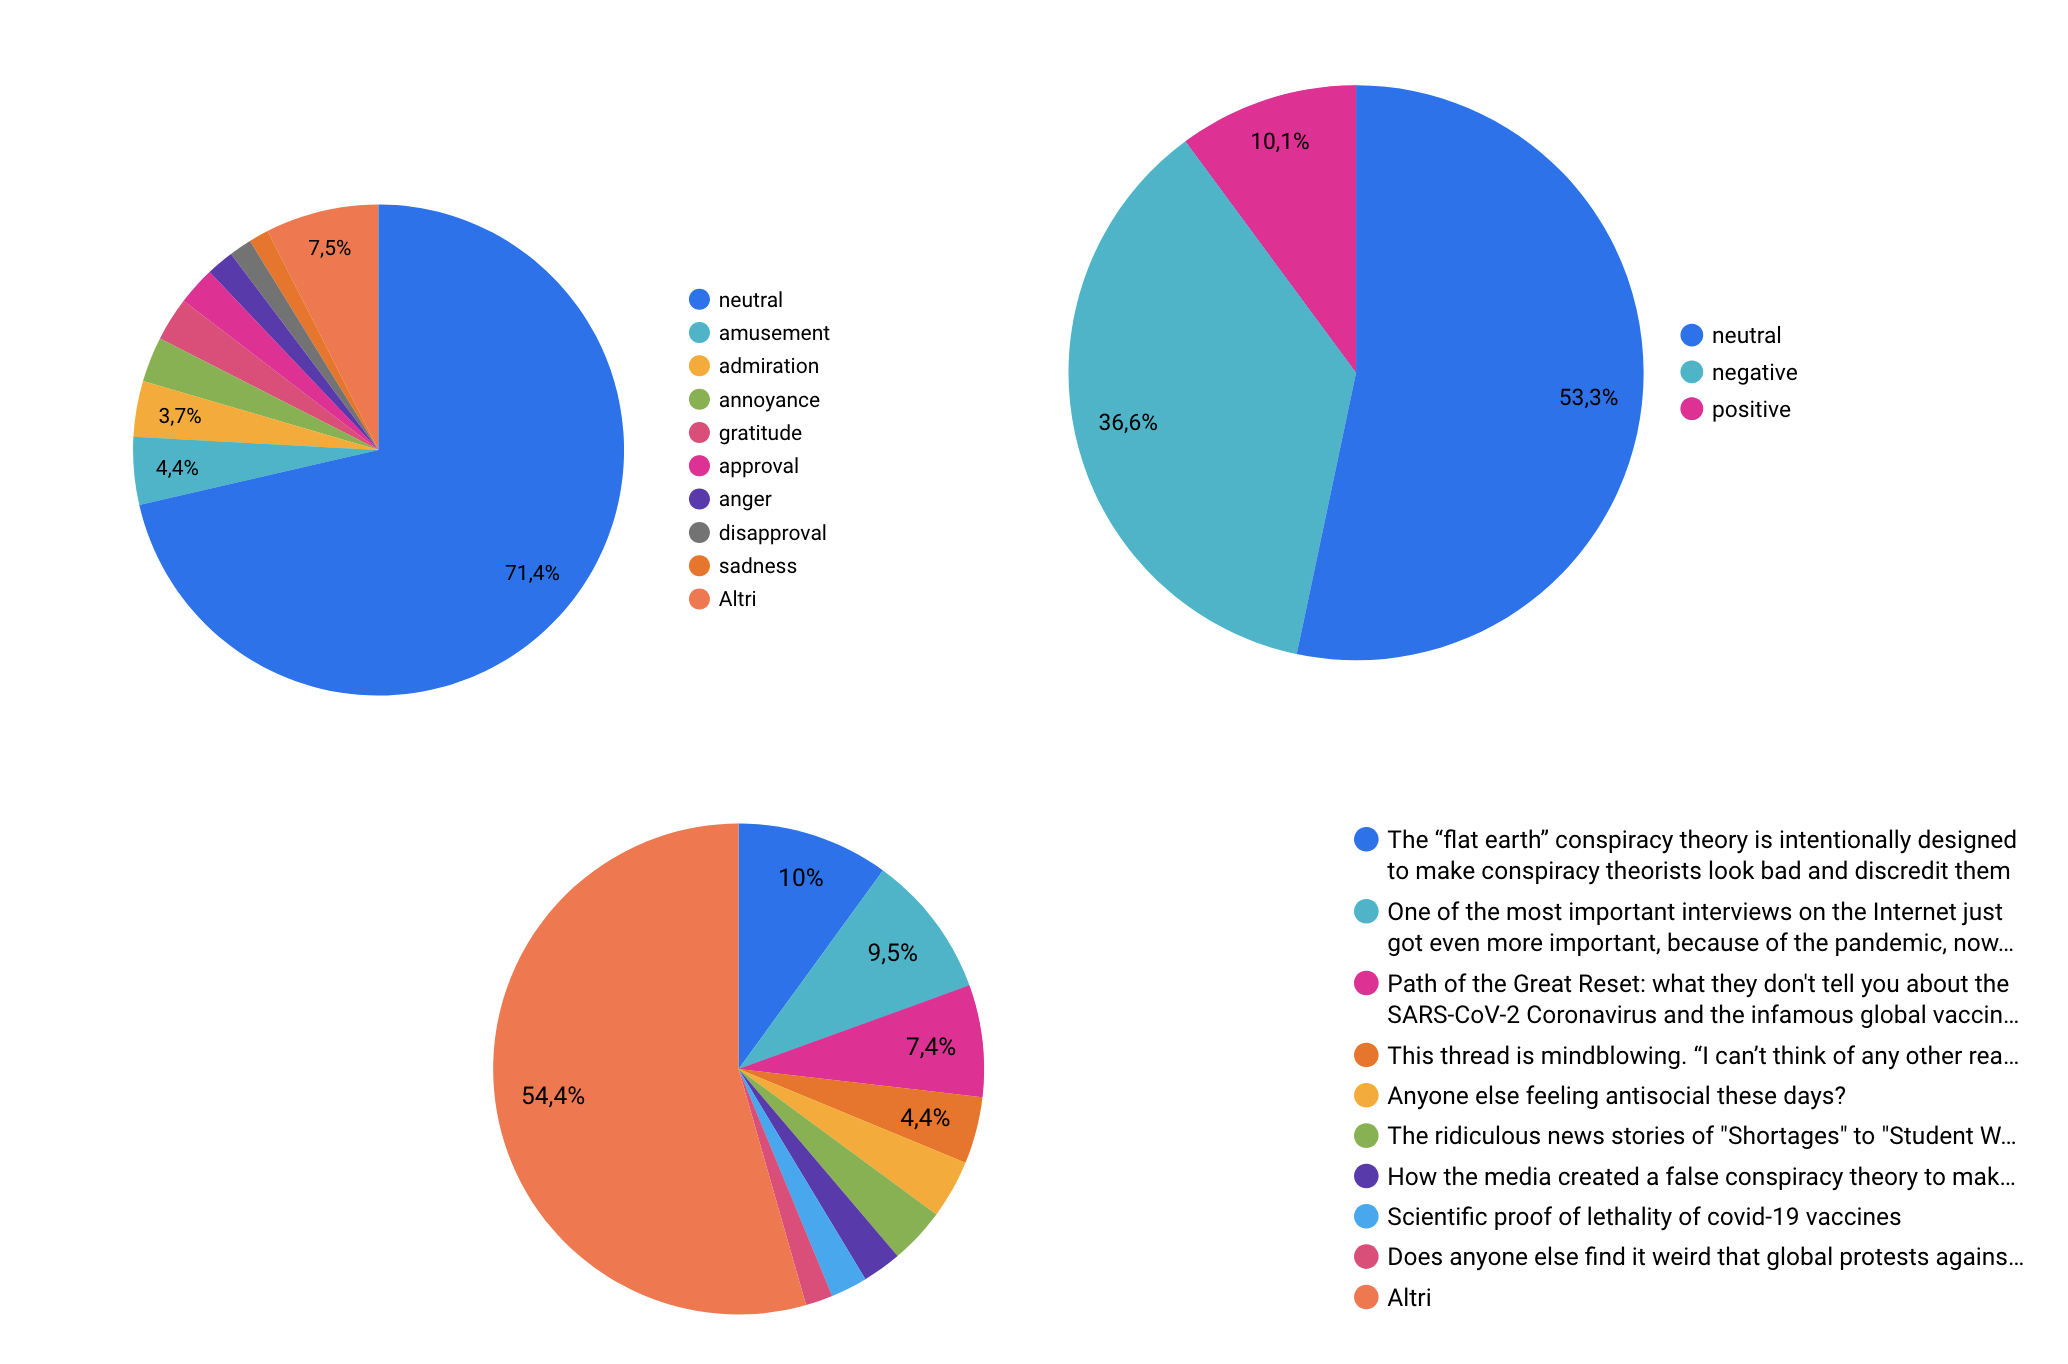.

The dashboard is available at the following link: [Covid-19 and
5G](https://lookerstudio.google.com/reporting/fff30f5e-4011-4fb8-b9c3-0f45b13817ac)

Alon, Titan, Matthias Doepke, Jane Olmstead-Rumsey, and Michèle Tertilt.
2020. “The Impact of COVID-19 on Gender Equality.”
<https://doi.org/10.3386/w26947>.

Bambra, Clare, Ryan Riordan, John Ford, and Fiona Matthews. 2020. “The
COVID-19 Pandemic and Health Inequalities.” *J Epidemiol Community
Health* 74 (11): 964–68. <https://doi.org/10.1136/jech-2020-214401>.

De’, Rahul, Neena Pandey, and Abhipsa Pal. 2020. “Impact of Digital
Surge During Covid-19 Pandemic: A Viewpoint on Research and Practice.”
*International Journal of Information Management*, Impact of COVID-19
pandemic on information management research and practice: Editorial
perspectives, 55 (December): 102171.
<https://doi.org/10.1016/j.ijinfomgt.2020.102171>.

“How Does Fake News of 5G and COVID-19 Spread Worldwide?” 2021.
<https://www.medicalnewstoday.com/articles/5g-doesnt-cause-covid-19-but-the-rumor-it-does-spread-like-a-virus>.

keck, Markus, and Patrick Sakdapolrak. 2013. “What Is Social Resilience?
Lessons Learned and Ways Forward.” *Erdkunde* 67 (1): 5–19.
<https://www.jstor.org/stable/23595352>.

Liu, Bing. 2012. *Sentiment Analysis and Opinion Mining*. San Rafael:
Morgan & Claypool Publishers.

Mohammad, Saif M., and Peter D. Turney. 2013. “Crowdsourcing a
WordEmotion Association Lexicon.” *Computational Intelligence* 29 (3):
436–65. <https://doi.org/10.1111/j.1467-8640.2012.00460.x>.